In [0]:
  # http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## Building Convnets
In this tutorial we build and evaluate Convolutional Networks on CIFAR-10 & The Dogs & Cat datasets.

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
from __future__ import print_function
import torch


In [0]:
x = torch.Tensor(3,3)

In [6]:
print(x)


 1.5065e-35  0.0000e+00  2.3822e-44
 0.0000e+00         nan  0.0000e+00
 1.7183e+19  2.8149e+23  4.8607e+30
[torch.FloatTensor of size 3x3]



In [9]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [3]:
# let's import the CIFAR 10 dataset
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


 frog   car   cat   car


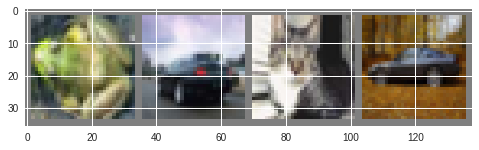

In [5]:
#let's display some of the image classes
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 +0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  
# get an iterator over the dataset
dataiter = iter(trainloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join("%5s" % classes[labels[j]] for j in range(4)))

In [0]:
import torch.optim as optim

# we use the same network defined above 
# we also use cross entroy as a loss function and stochastic gradient descent as optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)


In [0]:
# train the network for 50 epoch
for epoch in range(50):
  #for each epoch 
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    # get the inputs
    inputs,labels = data
    # wrap them in  autograd variable
    inputs,labels = Variable(inputs),Variable(labels)
    
    #zeroth the parameter gradients
    optimizer.zero_grad()
    
    # propagate forward then backwords -reverse differentiation- + optimize
    outputs = net(inputs)
    # calculate the loss  using predictions and true labels
    loss = criterion(outputs,labels)
    # backprop
    loss.backward()
    # optimizer step 
    optimizer.step() 
    
    # print training stats
    running_loss += loss.data[0]
    if i % 2000 == 1999 :
    # print every 2000 mini batch
      print('[{},{}] loss : {}'.format(epoch+1,i+1,running_loss/2000))
      running_loss = 0.0
    
    
print("Training Finished")

[1,2000] loss : 2.199081409394741
[1,4000] loss : 1.851521765768528
[1,6000] loss : 1.6554909658432007
[1,8000] loss : 1.5527769866138696
[1,10000] loss : 1.499676197141409
[1,12000] loss : 1.4783373314440251
[2,2000] loss : 1.4012490150034427
[2,4000] loss : 1.3792038052901625
[2,6000] loss : 1.351272756818682
[2,8000] loss : 1.2952178225293756
[2,10000] loss : 1.3042048356086016
[2,12000] loss : 1.2894081533718855
[3,2000] loss : 1.2270565679818393
[3,4000] loss : 1.1906248595938087
[3,6000] loss : 1.2093657634705306
[3,8000] loss : 1.2190852100625633
[3,10000] loss : 1.2098283506259322
[3,12000] loss : 1.1839056394929066
[4,2000] loss : 1.1430028459653259
[4,4000] loss : 1.1156820652373136
[4,6000] loss : 1.135551832543686
[4,8000] loss : 1.1184443356394769
[4,10000] loss : 1.1129506679475307
[4,12000] loss : 1.1068264991762116
[5,2000] loss : 1.0521950026322155
[5,4000] loss : 1.0504514939449727
[5,6000] loss : 1.063828557079658
[5,8000] loss : 1.0450340310642496
[5,10000] loss : 1

[13,6000] loss : 0.7844066559155181
[13,8000] loss : 0.7954506713160663
[13,10000] loss : 0.8415395298980874
[13,12000] loss : 0.8343481057614553
[14,2000] loss : 0.7142447508613113
[14,4000] loss : 0.7453984410820703
[14,6000] loss : 0.7789866510393331
[14,8000] loss : 0.7910791558817581
[14,10000] loss : 0.8165007535406766
[14,12000] loss : 0.8011688565069344
[15,2000] loss : 0.7025347296335968
[15,4000] loss : 0.7293481866021175
[15,6000] loss : 0.7591709963999456
[15,8000] loss : 0.7683084620360751
[15,10000] loss : 0.7772784308746923
[15,12000] loss : 0.771420510988828
[16,2000] loss : 0.6851816043942235
[16,4000] loss : 0.723719135551015
[16,6000] loss : 0.7296137833124084
[16,8000] loss : 0.7694458756134264
[16,10000] loss : 0.7567116469941684
[16,12000] loss : 0.7703857523415936
[17,2000] loss : 0.6700845103818865
[17,4000] loss : 0.7014501556953182
[17,6000] loss : 0.7068815687181778
[17,8000] loss : 0.7535301769414801
[17,10000] loss : 0.7484765502853552
[17,12000] loss : 0.7

[25,8000] loss : 0.6776236993494049
[25,10000] loss : 0.7077877779427508
[25,12000] loss : 0.7096256993524693
[26,2000] loss : 0.6085929038573231
[26,4000] loss : 0.6258882712164341
[26,6000] loss : 0.6542926400639272
[26,8000] loss : 0.66346656289167
[26,10000] loss : 0.6758930082991119
[26,12000] loss : 0.6962537522967431
[27,2000] loss : 0.5518043792252574
[27,4000] loss : 0.6003562124385062
[27,6000] loss : 0.6553974351392662


GroundTruth:    cat  ship  ship plane


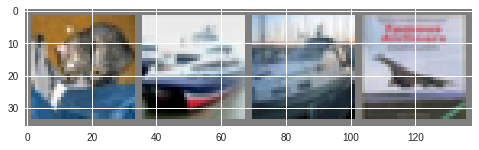

In [6]:
# we load test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
# we know try to predict the image classes using our network
# the output is a 1D vector holding energy values for each output neuron and each energy value stands for the probability of the input being that class
output = net(Variable(images))
_,predicted = torch.max(outputs.data,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer plane  deer   car


In [13]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 62 %
Accuracy of  bird : 39 %
Accuracy of   cat : 36 %
Accuracy of  deer : 54 %
Accuracy of   dog : 51 %
Accuracy of  frog : 61 %
Accuracy of horse : 62 %
Accuracy of  ship : 62 %
Accuracy of truck : 70 %


In [0]:
# let's use transfer learning
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy

plt.ion()   # interactive mode

The problem we’re going to solve today is to train a model to classify ants and bees,similarly to cats and dogs but with ants and bees.
We have about 120 training images each for ants and bees. There are 75 validation images for each class. Usually, this is a very small dataset to generalize upon, if trained from scratch. Since we are using transfer learning, we should be able to generalize reasonably well.



In [16]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2018-03-06 15:50:55--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.32.80.22, 13.32.80.95, 13.32.80.81, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.32.80.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  25.9MB/s    in 1.7s    

2018-03-06 15:50:58 (25.9 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



Here we downloaded the dataset from a remote location using !wget since we are working from a Jupyter notebook passing commands to the terminal requires the **!** .


In [18]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [19]:
  !unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318


  inflating: hymenoptera_data/val/bees/2415414155_1916f03b42.jpg  
  inflating: hymenoptera_data/val/bees/2438480600_40a1249879.jpg  
  inflating: hymenoptera_data/val/bees/2444778727_4b781ac424.jpg  
  inflating: hymenoptera_data/val/bees/2457841282_7867f16639.jpg  
  inflating: hymenoptera_data/val/bees/2470492902_3572c90f75.jpg  
  inflating: hymenoptera_data/val/bees/2478216347_535c8fe6d7.jpg  
  inflating: hymenoptera_data/val/bees/2501530886_e20952b97d.jpg  
  inflating: hymenoptera_data/val/bees/2506114833_90a41c5267.jpg  
  inflating: hymenoptera_data/val/bees/2509402554_31821cb0b6.jpg  
  inflating: hymenoptera_data/val/bees/2525379273_dcb26a516d.jpg  
  inflating: hymenoptera_data/val/bees/26589803_5ba7000313.jpg  
  inflating: hymenoptera_data/val/bees/2668391343_45e272cd07.jpg  
  inflating: hymenoptera_data/val/bees/2670536155_c170f49cd0.jpg  
  inflating: hymenoptera_data/val/bees/2685605303_9eed79d59d.jpg  
  inflating: hymenoptera_data/val/bees/2702408468_d9ed795f4f.jp

In [0]:
# data augmentation is a step where we generate new data from old data using different transforms
# like cropping,resizing ...
data_transforms = {
    # train set transformations
    'train':transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),    
    #validation set transformation
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

}
data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

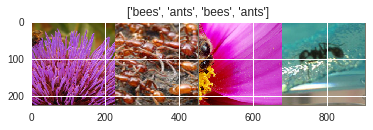

In [30]:

# visualizing few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [0]:
# train model function takes a model and trains it using learning rate scheduling and keep the best model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0] * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
# display predictions
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                model.train(mode=was_training)
                return
    model.train(mode=was_training)

In [33]:
# fine tunning ResNet
model_ft = models.resnet18(pretrained=True) # load pretrained resnet
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2) # we only want two classes

if use_gpu:
    model_ft = model_ft.cuda()

criterion = nn.CrossEntropyLoss() # binary classification we use cross entropy loss

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs Decay LR is a hyperparameter optimization trick)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /content/.torch/models/resnet18-5c106cde.pth
13.9%

100.0%


In [34]:
# train and evaluate different models 
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5493 Acc: 0.7254
val Loss: 0.5209 Acc: 0.8105

Epoch 1/24
----------
train Loss: 0.5830 Acc: 0.7746
val Loss: 0.2709 Acc: 0.9020

Epoch 2/24
----------
train Loss: 0.5672 Acc: 0.7705
val Loss: 1.0770 Acc: 0.6275

Epoch 3/24
----------
train Loss: 0.7406 Acc: 0.7090
val Loss: 0.2012 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.5846 Acc: 0.7951
val Loss: 0.3294 Acc: 0.8562

Epoch 5/24
----------
train Loss: 0.4250 Acc: 0.8238
val Loss: 0.2373 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.4633 Acc: 0.8156
val Loss: 0.1778 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.2672 Acc: 0.8648
val Loss: 0.1870 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.2890 Acc: 0.8770
val Loss: 0.2243 Acc: 0.9150

Epoch 9/24
----------
train Loss: 0.3121 Acc: 0.8852
val Loss: 0.1703 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.2912 Acc: 0.8525
val Loss: 0.1723 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.2414 Acc: 0.9057
val Loss: 0.2001 Acc: 0.9150

Ep

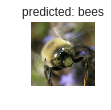

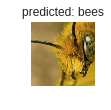

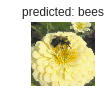

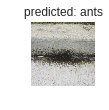

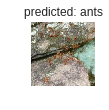

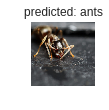

In [35]:
visualize_model(model_ft)

In [0]:
# freeze weights and optimize model for our task
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

if use_gpu:
    model_conv = model_conv.cuda()

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opoosed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)


In [37]:
# train the actual network for 25 epochs
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6685 Acc: 0.6230
val Loss: 0.1958 Acc: 0.9412

Epoch 1/24
----------
train Loss: 0.4356 Acc: 0.7910
val Loss: 0.1718 Acc: 0.9346

Epoch 2/24
----------
train Loss: 0.3657 Acc: 0.8402
val Loss: 0.1871 Acc: 0.9346

Epoch 3/24
----------
train Loss: 0.4666 Acc: 0.8238
val Loss: 0.6057 Acc: 0.7516

Epoch 4/24
----------
train Loss: 0.6151 Acc: 0.7377
val Loss: 0.2141 Acc: 0.9216

Epoch 5/24
----------
train Loss: 0.5154 Acc: 0.7787
val Loss: 0.2832 Acc: 0.8954

Epoch 6/24
----------
train Loss: 0.5616 Acc: 0.7582
val Loss: 0.1967 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.4016 Acc: 0.8033
val Loss: 0.2142 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.4344 Acc: 0.7992
val Loss: 0.1925 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3262 Acc: 0.8484
val Loss: 0.1902 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3273 Acc: 0.8525
val Loss: 0.1954 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.4675 Acc: 0.7910
val Loss: 0.1888 Acc: 0.9542

Ep

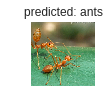

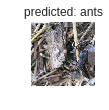

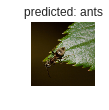

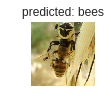

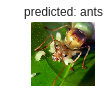

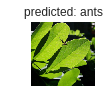

In [38]:
visualize_model(model_conv)

plt.ioff()
plt.show()

## Keras and Dogs vs Cats
Know that we've seen how to use pretrained convolutional networks and building our own with PyTorch let's build one using Keras .
To make things a little bit different we will use the dogs vs cats dataset from Kaggle .
The collab notebook allows access to the cli so we can use wget and a direct link to download the dataset from Microsoft instead of kaggle.

In [16]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2018-03-07 13:17:15--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.194.120.39, 2600:1402:2000:193::e59, 2600:1402:2000:1bb::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.194.120.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

.zip                 42%[=======>            ] 336.01M  5.44MB/s    eta 86s    

kagglecatsanddogs_3 100%[===================>] 786.68M  5.05MB/s    in 2m 27s  

2018-03-07 13:19:44 (5.34 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [19]:
!unzip kagglecatsanddogs_3367a.zip

Archive:  kagglecatsanddogs_3367a.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/10017.jpg  
  in


  inflating: PetImages/Cat/1073.jpg  
  inflating: PetImages/Cat/10730.jpg  
  inflating: PetImages/Cat/10731.jpg  
  inflating: PetImages/Cat/10732.jpg  
  inflating: PetImages/Cat/10733.jpg  
  inflating: PetImages/Cat/10734.jpg  
  inflating: PetImages/Cat/10735.jpg  
  inflating: PetImages/Cat/10736.jpg  
  inflating: PetImages/Cat/10737.jpg  
  inflating: PetImages/Cat/10738.jpg  
  inflating: PetImages/Cat/10739.jpg  
  inflating: PetImages/Cat/1074.jpg  
  inflating: PetImages/Cat/10740.jpg  
  inflating: PetImages/Cat/10741.jpg  
  inflating: PetImages/Cat/10742.jpg  
  inflating: PetImages/Cat/10743.jpg  
  inflating: PetImages/Cat/10744.jpg  
  inflating: PetImages/Cat/10745.jpg  
  inflating: PetImages/Cat/10746.jpg  
  inflating: PetImages/Cat/10747.jpg  
  inflating: PetImages/Cat/10748.jpg  
  inflating: PetImages/Cat/10749.jpg  
  inflating: PetImages/Cat/1075.jpg  
  inflating: PetImages/Cat/10750.jpg  
  inflating: PetImages/Cat/10751.jpg  
  inflating: PetImages/Cat/

  inflating: PetImages/Cat/1142.jpg  
  inflating: PetImages/Cat/11420.jpg  
  inflating: PetImages/Cat/11421.jpg  
  inflating: PetImages/Cat/11422.jpg  
  inflating: PetImages/Cat/11423.jpg  
  inflating: PetImages/Cat/11424.jpg  
  inflating: PetImages/Cat/11425.jpg  
  inflating: PetImages/Cat/11426.jpg  
  inflating: PetImages/Cat/11427.jpg  
  inflating: PetImages/Cat/11428.jpg  
  inflating: PetImages/Cat/11429.jpg  
  inflating: PetImages/Cat/1143.jpg  
  inflating: PetImages/Cat/11430.jpg  
  inflating: PetImages/Cat/11431.jpg  
  inflating: PetImages/Cat/11432.jpg  
  inflating: PetImages/Cat/11433.jpg  
  inflating: PetImages/Cat/11434.jpg  
  inflating: PetImages/Cat/11435.jpg  
  inflating: PetImages/Cat/11436.jpg  
  inflating: PetImages/Cat/11437.jpg  
  inflating: PetImages/Cat/11438.jpg  
  inflating: PetImages/Cat/11439.jpg  
  inflating: PetImages/Cat/1144.jpg  
  inflating: PetImages/Cat/11440.jpg  
  inflating: PetImages/Cat/11441.jpg  
  inflating: PetImages/Cat/1

  inflating: PetImages/Cat/12137.jpg  
  inflating: PetImages/Cat/12138.jpg  
  inflating: PetImages/Cat/12139.jpg  
  inflating: PetImages/Cat/1214.jpg  
  inflating: PetImages/Cat/12140.jpg  
  inflating: PetImages/Cat/12141.jpg  
  inflating: PetImages/Cat/12142.jpg  
  inflating: PetImages/Cat/12143.jpg  
  inflating: PetImages/Cat/12144.jpg  
  inflating: PetImages/Cat/12145.jpg  
  inflating: PetImages/Cat/12146.jpg  
  inflating: PetImages/Cat/12147.jpg  
  inflating: PetImages/Cat/12148.jpg  
  inflating: PetImages/Cat/12149.jpg  
  inflating: PetImages/Cat/1215.jpg  
  inflating: PetImages/Cat/12150.jpg  
  inflating: PetImages/Cat/12151.jpg  
  inflating: PetImages/Cat/12152.jpg  
  inflating: PetImages/Cat/12153.jpg  
  inflating: PetImages/Cat/12154.jpg  
  inflating: PetImages/Cat/12155.jpg  
  inflating: PetImages/Cat/12156.jpg  
  inflating: PetImages/Cat/12157.jpg  
  inflating: PetImages/Cat/12158.jpg  
  inflating: PetImages/Cat/12159.jpg  
  inflating: PetImages/Cat/


  inflating: PetImages/Cat/1612.jpg  
  inflating: PetImages/Cat/1613.jpg  
  inflating: PetImages/Cat/1614.jpg  
  inflating: PetImages/Cat/1615.jpg  
  inflating: PetImages/Cat/1616.jpg  
  inflating: PetImages/Cat/1617.jpg  
  inflating: PetImages/Cat/1618.jpg  
  inflating: PetImages/Cat/1619.jpg  
  inflating: PetImages/Cat/162.jpg   
  inflating: PetImages/Cat/1620.jpg  
  inflating: PetImages/Cat/1621.jpg  
  inflating: PetImages/Cat/1622.jpg  
  inflating: PetImages/Cat/1623.jpg  
  inflating: PetImages/Cat/1624.jpg  
  inflating: PetImages/Cat/1625.jpg  
  inflating: PetImages/Cat/1626.jpg  
  inflating: PetImages/Cat/1627.jpg  
  inflating: PetImages/Cat/1628.jpg  
  inflating: PetImages/Cat/1629.jpg  
  inflating: PetImages/Cat/163.jpg   
  inflating: PetImages/Cat/1630.jpg  
  inflating: PetImages/Cat/1631.jpg  
  inflating: PetImages/Cat/1632.jpg  
  inflating: PetImages/Cat/1633.jpg  
  inflating: PetImages/Cat/1634.jpg  
  inflating: PetImages/Cat/1635.jpg  
  inflating


  inflating: PetImages/Cat/2302.jpg  
  inflating: PetImages/Cat/2303.jpg  
  inflating: PetImages/Cat/2304.jpg  
  inflating: PetImages/Cat/2305.jpg  
  inflating: PetImages/Cat/2306.jpg  
  inflating: PetImages/Cat/2307.jpg  
  inflating: PetImages/Cat/2308.jpg  
  inflating: PetImages/Cat/2309.jpg  
  inflating: PetImages/Cat/231.jpg   
  inflating: PetImages/Cat/2310.jpg  
  inflating: PetImages/Cat/2311.jpg  
  inflating: PetImages/Cat/2312.jpg  
  inflating: PetImages/Cat/2313.jpg  
  inflating: PetImages/Cat/2314.jpg  
  inflating: PetImages/Cat/2315.jpg  
  inflating: PetImages/Cat/2316.jpg  
  inflating: PetImages/Cat/2317.jpg  
  inflating: PetImages/Cat/2318.jpg  
  inflating: PetImages/Cat/2319.jpg  
  inflating: PetImages/Cat/232.jpg   
  inflating: PetImages/Cat/2320.jpg  
  inflating: PetImages/Cat/2321.jpg  
  inflating: PetImages/Cat/2322.jpg  
  inflating: PetImages/Cat/2323.jpg  
  inflating: PetImages/Cat/2324.jpg  
  inflating: PetImages/Cat/2325.jpg  
  inflating


  inflating: PetImages/Cat/3026.jpg  
  inflating: PetImages/Cat/3027.jpg  
  inflating: PetImages/Cat/3028.jpg  
  inflating: PetImages/Cat/3029.jpg  
  inflating: PetImages/Cat/303.jpg   
  inflating: PetImages/Cat/3030.jpg  
  inflating: PetImages/Cat/3031.jpg  
  inflating: PetImages/Cat/3032.jpg  
  inflating: PetImages/Cat/3033.jpg  
  inflating: PetImages/Cat/3034.jpg  
  inflating: PetImages/Cat/3035.jpg  
  inflating: PetImages/Cat/3036.jpg  
  inflating: PetImages/Cat/3037.jpg  
  inflating: PetImages/Cat/3038.jpg  
  inflating: PetImages/Cat/3039.jpg  
  inflating: PetImages/Cat/304.jpg   
  inflating: PetImages/Cat/3040.jpg  
  inflating: PetImages/Cat/3041.jpg  
  inflating: PetImages/Cat/3042.jpg  
  inflating: PetImages/Cat/3043.jpg  
  inflating: PetImages/Cat/3044.jpg  
  inflating: PetImages/Cat/3045.jpg  
  inflating: PetImages/Cat/3046.jpg  
  inflating: PetImages/Cat/3047.jpg  
  inflating: PetImages/Cat/3048.jpg  
  inflating: PetImages/Cat/3049.jpg  
  inflating


  inflating: PetImages/Cat/3633.jpg  
  inflating: PetImages/Cat/3634.jpg  
  inflating: PetImages/Cat/3635.jpg  
  inflating: PetImages/Cat/3636.jpg  
  inflating: PetImages/Cat/3637.jpg  
  inflating: PetImages/Cat/3638.jpg  
  inflating: PetImages/Cat/3639.jpg  
  inflating: PetImages/Cat/364.jpg   
  inflating: PetImages/Cat/3640.jpg  
  inflating: PetImages/Cat/3641.jpg  
  inflating: PetImages/Cat/3642.jpg  
  inflating: PetImages/Cat/3643.jpg  
  inflating: PetImages/Cat/3644.jpg  
  inflating: PetImages/Cat/3645.jpg  
  inflating: PetImages/Cat/3646.jpg  
  inflating: PetImages/Cat/3647.jpg  
  inflating: PetImages/Cat/3648.jpg  
  inflating: PetImages/Cat/3649.jpg  
  inflating: PetImages/Cat/365.jpg   
  inflating: PetImages/Cat/3650.jpg  
  inflating: PetImages/Cat/3651.jpg  
  inflating: PetImages/Cat/3652.jpg  
  inflating: PetImages/Cat/3653.jpg  
  inflating: PetImages/Cat/3654.jpg  
  inflating: PetImages/Cat/3655.jpg  
  inflating: PetImages/Cat/3656.jpg  
  inflating


  inflating: PetImages/Cat/4205.jpg  
  inflating: PetImages/Cat/4206.jpg  
  inflating: PetImages/Cat/4207.jpg  
  inflating: PetImages/Cat/4208.jpg  
  inflating: PetImages/Cat/4209.jpg  
  inflating: PetImages/Cat/421.jpg   
  inflating: PetImages/Cat/4210.jpg  
  inflating: PetImages/Cat/4211.jpg  
  inflating: PetImages/Cat/4212.jpg  
  inflating: PetImages/Cat/4213.jpg  
  inflating: PetImages/Cat/4214.jpg  
  inflating: PetImages/Cat/4215.jpg  
  inflating: PetImages/Cat/4216.jpg  
  inflating: PetImages/Cat/4217.jpg  
  inflating: PetImages/Cat/4218.jpg  
  inflating: PetImages/Cat/4219.jpg  
  inflating: PetImages/Cat/422.jpg   
  inflating: PetImages/Cat/4220.jpg  
  inflating: PetImages/Cat/4221.jpg  
  inflating: PetImages/Cat/4222.jpg  
  inflating: PetImages/Cat/4223.jpg  
  inflating: PetImages/Cat/4224.jpg  
  inflating: PetImages/Cat/4225.jpg  
  inflating: PetImages/Cat/4226.jpg  
  inflating: PetImages/Cat/4227.jpg  
  inflating: PetImages/Cat/4228.jpg  
  inflating

  inflating: PetImages/Cat/48.jpg    
  inflating: PetImages/Cat/480.jpg   
  inflating: PetImages/Cat/4800.jpg  
  inflating: PetImages/Cat/4801.jpg  
  inflating: PetImages/Cat/4802.jpg  
  inflating: PetImages/Cat/4803.jpg  
  inflating: PetImages/Cat/4804.jpg  
  inflating: PetImages/Cat/4805.jpg  
  inflating: PetImages/Cat/4806.jpg  
  inflating: PetImages/Cat/4807.jpg  
  inflating: PetImages/Cat/4808.jpg  
  inflating: PetImages/Cat/4809.jpg  
  inflating: PetImages/Cat/481.jpg   
  inflating: PetImages/Cat/4810.jpg  
  inflating: PetImages/Cat/4811.jpg  
  inflating: PetImages/Cat/4812.jpg  
  inflating: PetImages/Cat/4813.jpg  
  inflating: PetImages/Cat/4814.jpg  
  inflating: PetImages/Cat/4815.jpg  
  inflating: PetImages/Cat/4816.jpg  
  inflating: PetImages/Cat/4817.jpg  
  inflating: PetImages/Cat/4818.jpg  
  inflating: PetImages/Cat/4819.jpg  
  inflating: PetImages/Cat/482.jpg   
  inflating: PetImages/Cat/4820.jpg  
  inflating: PetImages/Cat/4821.jpg  
  inflating:


  inflating: PetImages/Cat/5396.jpg  
  inflating: PetImages/Cat/5397.jpg  
  inflating: PetImages/Cat/5398.jpg  
  inflating: PetImages/Cat/5399.jpg  
  inflating: PetImages/Cat/54.jpg    
  inflating: PetImages/Cat/540.jpg   
  inflating: PetImages/Cat/5400.jpg  
  inflating: PetImages/Cat/5401.jpg  
  inflating: PetImages/Cat/5402.jpg  
  inflating: PetImages/Cat/5403.jpg  
  inflating: PetImages/Cat/5404.jpg  
  inflating: PetImages/Cat/5405.jpg  
  inflating: PetImages/Cat/5406.jpg  
  inflating: PetImages/Cat/5407.jpg  
  inflating: PetImages/Cat/5408.jpg  
  inflating: PetImages/Cat/5409.jpg  
  inflating: PetImages/Cat/541.jpg   
  inflating: PetImages/Cat/5410.jpg  
  inflating: PetImages/Cat/5411.jpg  
  inflating: PetImages/Cat/5412.jpg  
  inflating: PetImages/Cat/5413.jpg  
  inflating: PetImages/Cat/5414.jpg  
  inflating: PetImages/Cat/5415.jpg  
  inflating: PetImages/Cat/5416.jpg  
  inflating: PetImages/Cat/5417.jpg  
  inflating: PetImages/Cat/5418.jpg  
  inflating

  inflating: PetImages/Cat/5987.jpg  
  inflating: PetImages/Cat/5988.jpg  
  inflating: PetImages/Cat/5989.jpg  
  inflating: PetImages/Cat/599.jpg   
  inflating: PetImages/Cat/5990.jpg  
  inflating: PetImages/Cat/5991.jpg  
  inflating: PetImages/Cat/5992.jpg  
  inflating: PetImages/Cat/5993.jpg  
  inflating: PetImages/Cat/5994.jpg  
  inflating: PetImages/Cat/5995.jpg  
  inflating: PetImages/Cat/5996.jpg  
  inflating: PetImages/Cat/5997.jpg  
  inflating: PetImages/Cat/5998.jpg  
  inflating: PetImages/Cat/5999.jpg  
  inflating: PetImages/Cat/6.jpg     
  inflating: PetImages/Cat/60.jpg    
  inflating: PetImages/Cat/600.jpg   
  inflating: PetImages/Cat/6000.jpg  
  inflating: PetImages/Cat/6001.jpg  
  inflating: PetImages/Cat/6002.jpg  
  inflating: PetImages/Cat/6003.jpg  
  inflating: PetImages/Cat/6004.jpg  
  inflating: PetImages/Cat/6005.jpg  
  inflating: PetImages/Cat/6006.jpg  
  inflating: PetImages/Cat/6007.jpg  
  inflating: PetImages/Cat/6008.jpg  
  inflating:

  inflating: PetImages/Cat/6596.jpg  
  inflating: PetImages/Cat/6597.jpg  
  inflating: PetImages/Cat/6598.jpg  
  inflating: PetImages/Cat/6599.jpg  
  inflating: PetImages/Cat/66.jpg    
  inflating: PetImages/Cat/660.jpg   
  inflating: PetImages/Cat/6600.jpg  
  inflating: PetImages/Cat/6601.jpg  
  inflating: PetImages/Cat/6602.jpg  
  inflating: PetImages/Cat/6603.jpg  
  inflating: PetImages/Cat/6604.jpg  
  inflating: PetImages/Cat/6605.jpg  
  inflating: PetImages/Cat/6606.jpg  
  inflating: PetImages/Cat/6607.jpg  
  inflating: PetImages/Cat/6608.jpg  
  inflating: PetImages/Cat/6609.jpg  
  inflating: PetImages/Cat/661.jpg   
  inflating: PetImages/Cat/6610.jpg  
  inflating: PetImages/Cat/6611.jpg  
  inflating: PetImages/Cat/6612.jpg  
  inflating: PetImages/Cat/6613.jpg  
  inflating: PetImages/Cat/6614.jpg  
  inflating: PetImages/Cat/6615.jpg  
  inflating: PetImages/Cat/6616.jpg  
  inflating: PetImages/Cat/6617.jpg  
  inflating: PetImages/Cat/6618.jpg  
  inflating:


  inflating: PetImages/Cat/7187.jpg  
  inflating: PetImages/Cat/7188.jpg  
  inflating: PetImages/Cat/7189.jpg  
  inflating: PetImages/Cat/719.jpg   
  inflating: PetImages/Cat/7190.jpg  
  inflating: PetImages/Cat/7191.jpg  
  inflating: PetImages/Cat/7192.jpg  
  inflating: PetImages/Cat/7193.jpg  
  inflating: PetImages/Cat/7194.jpg  
  inflating: PetImages/Cat/7195.jpg  
  inflating: PetImages/Cat/7196.jpg  
  inflating: PetImages/Cat/7197.jpg  
  inflating: PetImages/Cat/7198.jpg  
  inflating: PetImages/Cat/7199.jpg  
  inflating: PetImages/Cat/72.jpg    
  inflating: PetImages/Cat/720.jpg   
  inflating: PetImages/Cat/7200.jpg  
  inflating: PetImages/Cat/7201.jpg  
  inflating: PetImages/Cat/7202.jpg  
  inflating: PetImages/Cat/7203.jpg  
  inflating: PetImages/Cat/7204.jpg  
  inflating: PetImages/Cat/7205.jpg  
  inflating: PetImages/Cat/7206.jpg  
  inflating: PetImages/Cat/7207.jpg  
  inflating: PetImages/Cat/7208.jpg  
  inflating: PetImages/Cat/7209.jpg  
  inflating


  inflating: PetImages/Cat/7767.jpg  
  inflating: PetImages/Cat/7768.jpg  
  inflating: PetImages/Cat/7769.jpg  
  inflating: PetImages/Cat/777.jpg   
  inflating: PetImages/Cat/7770.jpg  
  inflating: PetImages/Cat/7771.jpg  
  inflating: PetImages/Cat/7772.jpg  
  inflating: PetImages/Cat/7773.jpg  
  inflating: PetImages/Cat/7774.jpg  
  inflating: PetImages/Cat/7775.jpg  
  inflating: PetImages/Cat/7776.jpg  
  inflating: PetImages/Cat/7777.jpg  
  inflating: PetImages/Cat/7778.jpg  
  inflating: PetImages/Cat/7779.jpg  
  inflating: PetImages/Cat/778.jpg   
  inflating: PetImages/Cat/7780.jpg  
  inflating: PetImages/Cat/7781.jpg  
  inflating: PetImages/Cat/7782.jpg  
  inflating: PetImages/Cat/7783.jpg  
  inflating: PetImages/Cat/7784.jpg  
  inflating: PetImages/Cat/7785.jpg  
  inflating: PetImages/Cat/7786.jpg  
  inflating: PetImages/Cat/7787.jpg  
  inflating: PetImages/Cat/7788.jpg  
  inflating: PetImages/Cat/7789.jpg  
  inflating: PetImages/Cat/779.jpg   
  inflating


  inflating: PetImages/Cat/8340.jpg  
  inflating: PetImages/Cat/8341.jpg  
  inflating: PetImages/Cat/8342.jpg  
  inflating: PetImages/Cat/8343.jpg  
  inflating: PetImages/Cat/8344.jpg  
  inflating: PetImages/Cat/8345.jpg  
  inflating: PetImages/Cat/8346.jpg  
  inflating: PetImages/Cat/8347.jpg  
  inflating: PetImages/Cat/8348.jpg  
  inflating: PetImages/Cat/8349.jpg  
  inflating: PetImages/Cat/835.jpg   
  inflating: PetImages/Cat/8350.jpg  
  inflating: PetImages/Cat/8351.jpg  
  inflating: PetImages/Cat/8352.jpg  
  inflating: PetImages/Cat/8353.jpg  
  inflating: PetImages/Cat/8354.jpg  
  inflating: PetImages/Cat/8355.jpg  
  inflating: PetImages/Cat/8356.jpg  
  inflating: PetImages/Cat/8357.jpg  
  inflating: PetImages/Cat/8358.jpg  
  inflating: PetImages/Cat/8359.jpg  
  inflating: PetImages/Cat/836.jpg   
  inflating: PetImages/Cat/8360.jpg  
  inflating: PetImages/Cat/8361.jpg  
  inflating: PetImages/Cat/8362.jpg  
  inflating: PetImages/Cat/8363.jpg  
  inflating

  inflating: PetImages/Cat/8931.jpg  
  inflating: PetImages/Cat/8932.jpg  
  inflating: PetImages/Cat/8933.jpg  
  inflating: PetImages/Cat/8934.jpg  
  inflating: PetImages/Cat/8935.jpg  
  inflating: PetImages/Cat/8936.jpg  
  inflating: PetImages/Cat/8937.jpg  
  inflating: PetImages/Cat/8938.jpg  
  inflating: PetImages/Cat/8939.jpg  
  inflating: PetImages/Cat/894.jpg   
  inflating: PetImages/Cat/8940.jpg  
  inflating: PetImages/Cat/8941.jpg  
  inflating: PetImages/Cat/8942.jpg  
  inflating: PetImages/Cat/8943.jpg  
  inflating: PetImages/Cat/8944.jpg  
  inflating: PetImages/Cat/8945.jpg  
  inflating: PetImages/Cat/8946.jpg  
  inflating: PetImages/Cat/8947.jpg  
  inflating: PetImages/Cat/8948.jpg  
  inflating: PetImages/Cat/8949.jpg  
  inflating: PetImages/Cat/895.jpg   
  inflating: PetImages/Cat/8950.jpg  
  inflating: PetImages/Cat/8951.jpg  
  inflating: PetImages/Cat/8952.jpg  
  inflating: PetImages/Cat/8953.jpg  
  inflating: PetImages/Cat/8954.jpg  
  inflating:


  inflating: PetImages/Cat/9506.jpg  
  inflating: PetImages/Cat/9507.jpg  
  inflating: PetImages/Cat/9508.jpg  
  inflating: PetImages/Cat/9509.jpg  
  inflating: PetImages/Cat/951.jpg   
  inflating: PetImages/Cat/9510.jpg  
  inflating: PetImages/Cat/9511.jpg  
  inflating: PetImages/Cat/9512.jpg  
  inflating: PetImages/Cat/9513.jpg  
  inflating: PetImages/Cat/9514.jpg  
  inflating: PetImages/Cat/9515.jpg  
  inflating: PetImages/Cat/9516.jpg  
  inflating: PetImages/Cat/9517.jpg  
  inflating: PetImages/Cat/9518.jpg  
  inflating: PetImages/Cat/9519.jpg  
  inflating: PetImages/Cat/952.jpg   
  inflating: PetImages/Cat/9520.jpg  
  inflating: PetImages/Cat/9521.jpg  
  inflating: PetImages/Cat/9522.jpg  
  inflating: PetImages/Cat/9523.jpg  
  inflating: PetImages/Cat/9524.jpg  
  inflating: PetImages/Cat/9525.jpg  
  inflating: PetImages/Cat/9526.jpg  
  inflating: PetImages/Cat/9527.jpg  
  inflating: PetImages/Cat/9528.jpg  
  inflating: PetImages/Cat/9529.jpg  
  inflating


  inflating: PetImages/Dog/10035.jpg  
  inflating: PetImages/Dog/10036.jpg  
  inflating: PetImages/Dog/10037.jpg  
  inflating: PetImages/Dog/10038.jpg  
  inflating: PetImages/Dog/10039.jpg  
  inflating: PetImages/Dog/1004.jpg  
  inflating: PetImages/Dog/10040.jpg  
  inflating: PetImages/Dog/10041.jpg  
  inflating: PetImages/Dog/10042.jpg  
  inflating: PetImages/Dog/10043.jpg  
  inflating: PetImages/Dog/10044.jpg  
  inflating: PetImages/Dog/10045.jpg  
  inflating: PetImages/Dog/10046.jpg  
  inflating: PetImages/Dog/10047.jpg  
  inflating: PetImages/Dog/10048.jpg  
  inflating: PetImages/Dog/10049.jpg  
  inflating: PetImages/Dog/1005.jpg  
  inflating: PetImages/Dog/10050.jpg  
  inflating: PetImages/Dog/10051.jpg  
  inflating: PetImages/Dog/10052.jpg  
  inflating: PetImages/Dog/10053.jpg  
  inflating: PetImages/Dog/10054.jpg  
  inflating: PetImages/Dog/10055.jpg  
  inflating: PetImages/Dog/10056.jpg  
  inflating: PetImages/Dog/10057.jpg  
  inflating: PetImages/Dog

  inflating: PetImages/Dog/10595.jpg  
  inflating: PetImages/Dog/10596.jpg  
  inflating: PetImages/Dog/10597.jpg  
  inflating: PetImages/Dog/10598.jpg  
  inflating: PetImages/Dog/10599.jpg  
  inflating: PetImages/Dog/106.jpg   
  inflating: PetImages/Dog/1060.jpg  
  inflating: PetImages/Dog/10600.jpg  
  inflating: PetImages/Dog/10601.jpg  
  inflating: PetImages/Dog/10602.jpg  
  inflating: PetImages/Dog/10603.jpg  
  inflating: PetImages/Dog/10604.jpg  
  inflating: PetImages/Dog/10605.jpg  
  inflating: PetImages/Dog/10606.jpg  
  inflating: PetImages/Dog/10607.jpg  
  inflating: PetImages/Dog/10608.jpg  
  inflating: PetImages/Dog/10609.jpg  
  inflating: PetImages/Dog/1061.jpg  
  inflating: PetImages/Dog/10610.jpg  
  inflating: PetImages/Dog/10611.jpg  
  inflating: PetImages/Dog/10612.jpg  
  inflating: PetImages/Dog/10613.jpg  
  inflating: PetImages/Dog/10614.jpg  
  inflating: PetImages/Dog/10615.jpg  
  inflating: PetImages/Dog/10616.jpg  
  inflating: PetImages/Dog/1

  inflating: PetImages/Dog/11228.jpg  
  inflating: PetImages/Dog/11229.jpg  
  inflating: PetImages/Dog/1123.jpg  
  inflating: PetImages/Dog/11230.jpg  
  inflating: PetImages/Dog/11231.jpg  
  inflating: PetImages/Dog/11232.jpg  
  inflating: PetImages/Dog/11233.jpg  
  inflating: PetImages/Dog/11234.jpg  
  inflating: PetImages/Dog/11235.jpg  
  inflating: PetImages/Dog/11236.jpg  
  inflating: PetImages/Dog/11237.jpg  
  inflating: PetImages/Dog/11238.jpg  
  inflating: PetImages/Dog/11239.jpg  
  inflating: PetImages/Dog/1124.jpg  
  inflating: PetImages/Dog/11240.jpg  
  inflating: PetImages/Dog/11241.jpg  
  inflating: PetImages/Dog/11242.jpg  
  inflating: PetImages/Dog/11243.jpg  
  inflating: PetImages/Dog/11244.jpg  
  inflating: PetImages/Dog/11245.jpg  
  inflating: PetImages/Dog/11246.jpg  
  inflating: PetImages/Dog/11247.jpg  
  inflating: PetImages/Dog/11248.jpg  
  inflating: PetImages/Dog/11249.jpg  
  inflating: PetImages/Dog/1125.jpg  
  inflating: PetImages/Dog/1


  inflating: PetImages/Dog/11848.jpg  
  inflating: PetImages/Dog/11849.jpg  
  inflating: PetImages/Dog/1185.jpg  
  inflating: PetImages/Dog/11850.jpg  
  inflating: PetImages/Dog/11851.jpg  
  inflating: PetImages/Dog/11852.jpg  
  inflating: PetImages/Dog/11853.jpg  
  inflating: PetImages/Dog/11854.jpg  
  inflating: PetImages/Dog/11855.jpg  
  inflating: PetImages/Dog/11856.jpg  
  inflating: PetImages/Dog/11857.jpg  
  inflating: PetImages/Dog/11858.jpg  
  inflating: PetImages/Dog/11859.jpg  
  inflating: PetImages/Dog/1186.jpg  
  inflating: PetImages/Dog/11860.jpg  
  inflating: PetImages/Dog/11861.jpg  
  inflating: PetImages/Dog/11862.jpg  
  inflating: PetImages/Dog/11863.jpg  
  inflating: PetImages/Dog/11864.jpg  
  inflating: PetImages/Dog/11865.jpg  
  inflating: PetImages/Dog/11866.jpg  
  inflating: PetImages/Dog/11867.jpg  
  inflating: PetImages/Dog/11868.jpg  
  inflating: PetImages/Dog/11869.jpg  
  inflating: PetImages/Dog/1187.jpg  
  inflating: PetImages/Dog/


  inflating: PetImages/Dog/12428.jpg  
  inflating: PetImages/Dog/12429.jpg  
  inflating: PetImages/Dog/1243.jpg  
  inflating: PetImages/Dog/12430.jpg  
  inflating: PetImages/Dog/12431.jpg  
  inflating: PetImages/Dog/12432.jpg  
  inflating: PetImages/Dog/12433.jpg  
  inflating: PetImages/Dog/12434.jpg  
  inflating: PetImages/Dog/12435.jpg  
  inflating: PetImages/Dog/12436.jpg  
  inflating: PetImages/Dog/12437.jpg  
  inflating: PetImages/Dog/12438.jpg  
  inflating: PetImages/Dog/12439.jpg  
  inflating: PetImages/Dog/1244.jpg  
  inflating: PetImages/Dog/12440.jpg  
  inflating: PetImages/Dog/12441.jpg  
  inflating: PetImages/Dog/12442.jpg  
  inflating: PetImages/Dog/12443.jpg  
  inflating: PetImages/Dog/12444.jpg  
  inflating: PetImages/Dog/12445.jpg  
  inflating: PetImages/Dog/12446.jpg  
  inflating: PetImages/Dog/12447.jpg  
  inflating: PetImages/Dog/12448.jpg  
  inflating: PetImages/Dog/12449.jpg  
  inflating: PetImages/Dog/1245.jpg  
  inflating: PetImages/Dog/


  inflating: PetImages/Dog/1745.jpg  
  inflating: PetImages/Dog/1746.jpg  
  inflating: PetImages/Dog/1747.jpg  
  inflating: PetImages/Dog/1748.jpg  
  inflating: PetImages/Dog/1749.jpg  
  inflating: PetImages/Dog/175.jpg   
  inflating: PetImages/Dog/1750.jpg  
  inflating: PetImages/Dog/1751.jpg  
  inflating: PetImages/Dog/1752.jpg  
  inflating: PetImages/Dog/1753.jpg  
  inflating: PetImages/Dog/1754.jpg  
  inflating: PetImages/Dog/1755.jpg  
  inflating: PetImages/Dog/1756.jpg  
  inflating: PetImages/Dog/1757.jpg  
  inflating: PetImages/Dog/1758.jpg  
  inflating: PetImages/Dog/1759.jpg  
  inflating: PetImages/Dog/176.jpg   
  inflating: PetImages/Dog/1760.jpg  
  inflating: PetImages/Dog/1761.jpg  
  inflating: PetImages/Dog/1762.jpg  
  inflating: PetImages/Dog/1763.jpg  
  inflating: PetImages/Dog/1764.jpg  
  inflating: PetImages/Dog/1765.jpg  
  inflating: PetImages/Dog/1766.jpg  
  inflating: PetImages/Dog/1767.jpg  
  inflating: PetImages/Dog/1768.jpg  
  inflating


  inflating: PetImages/Dog/2366.jpg  
  inflating: PetImages/Dog/2367.jpg  
  inflating: PetImages/Dog/2368.jpg  
  inflating: PetImages/Dog/2369.jpg  
  inflating: PetImages/Dog/237.jpg   
  inflating: PetImages/Dog/2370.jpg  
  inflating: PetImages/Dog/2371.jpg  
  inflating: PetImages/Dog/2372.jpg  
  inflating: PetImages/Dog/2373.jpg  
  inflating: PetImages/Dog/2374.jpg  
  inflating: PetImages/Dog/2375.jpg  
  inflating: PetImages/Dog/2376.jpg  
  inflating: PetImages/Dog/2377.jpg  
  inflating: PetImages/Dog/2378.jpg  
  inflating: PetImages/Dog/2379.jpg  
  inflating: PetImages/Dog/238.jpg   
  inflating: PetImages/Dog/2380.jpg  
  inflating: PetImages/Dog/2381.jpg  
  inflating: PetImages/Dog/2382.jpg  
  inflating: PetImages/Dog/2383.jpg  
  inflating: PetImages/Dog/2384.jpg  
  inflating: PetImages/Dog/2385.jpg  
  inflating: PetImages/Dog/2386.jpg  
  inflating: PetImages/Dog/2387.jpg  
  inflating: PetImages/Dog/2388.jpg  
  inflating: PetImages/Dog/2389.jpg  
  inflating


  inflating: PetImages/Dog/301.jpg   
  inflating: PetImages/Dog/3010.jpg  
  inflating: PetImages/Dog/3011.jpg  
  inflating: PetImages/Dog/3012.jpg  
  inflating: PetImages/Dog/3013.jpg  
  inflating: PetImages/Dog/3014.jpg  
  inflating: PetImages/Dog/3015.jpg  
  inflating: PetImages/Dog/3016.jpg  
  inflating: PetImages/Dog/3017.jpg  
  inflating: PetImages/Dog/3018.jpg  
  inflating: PetImages/Dog/3019.jpg  
  inflating: PetImages/Dog/302.jpg   
  inflating: PetImages/Dog/3020.jpg  
  inflating: PetImages/Dog/3021.jpg  
  inflating: PetImages/Dog/3022.jpg  
  inflating: PetImages/Dog/3023.jpg  
  inflating: PetImages/Dog/3024.jpg  
  inflating: PetImages/Dog/3025.jpg  
  inflating: PetImages/Dog/3026.jpg  
  inflating: PetImages/Dog/3027.jpg  
  inflating: PetImages/Dog/3028.jpg  
  inflating: PetImages/Dog/3029.jpg  
  inflating: PetImages/Dog/303.jpg   
  inflating: PetImages/Dog/3030.jpg  
  inflating: PetImages/Dog/3031.jpg  
  inflating: PetImages/Dog/3032.jpg  
  inflating


  inflating: PetImages/Dog/3671.jpg  
  inflating: PetImages/Dog/3672.jpg  
  inflating: PetImages/Dog/3673.jpg  
  inflating: PetImages/Dog/3674.jpg  
  inflating: PetImages/Dog/3675.jpg  
  inflating: PetImages/Dog/3676.jpg  
  inflating: PetImages/Dog/3677.jpg  
  inflating: PetImages/Dog/3678.jpg  
  inflating: PetImages/Dog/3679.jpg  
  inflating: PetImages/Dog/368.jpg   
  inflating: PetImages/Dog/3680.jpg  
  inflating: PetImages/Dog/3681.jpg  
  inflating: PetImages/Dog/3682.jpg  
  inflating: PetImages/Dog/3683.jpg  
  inflating: PetImages/Dog/3684.jpg  
  inflating: PetImages/Dog/3685.jpg  
  inflating: PetImages/Dog/3686.jpg  
  inflating: PetImages/Dog/3687.jpg  
  inflating: PetImages/Dog/3688.jpg  
  inflating: PetImages/Dog/3689.jpg  
  inflating: PetImages/Dog/369.jpg   
  inflating: PetImages/Dog/3690.jpg  
  inflating: PetImages/Dog/3691.jpg  
  inflating: PetImages/Dog/3692.jpg  
  inflating: PetImages/Dog/3693.jpg  
  inflating: PetImages/Dog/3694.jpg  
  inflating


  inflating: PetImages/Dog/4314.jpg  
  inflating: PetImages/Dog/4315.jpg  
  inflating: PetImages/Dog/4316.jpg  
  inflating: PetImages/Dog/4317.jpg  
  inflating: PetImages/Dog/4318.jpg  
  inflating: PetImages/Dog/4319.jpg  
  inflating: PetImages/Dog/432.jpg   
  inflating: PetImages/Dog/4320.jpg  
  inflating: PetImages/Dog/4321.jpg  
  inflating: PetImages/Dog/4322.jpg  
  inflating: PetImages/Dog/4323.jpg  
  inflating: PetImages/Dog/4324.jpg  
  inflating: PetImages/Dog/4325.jpg  
  inflating: PetImages/Dog/4326.jpg  
  inflating: PetImages/Dog/4327.jpg  
  inflating: PetImages/Dog/4328.jpg  
  inflating: PetImages/Dog/4329.jpg  
  inflating: PetImages/Dog/433.jpg   
  inflating: PetImages/Dog/4330.jpg  
  inflating: PetImages/Dog/4331.jpg  
  inflating: PetImages/Dog/4332.jpg  
  inflating: PetImages/Dog/4333.jpg  
  inflating: PetImages/Dog/4334.jpg  
  inflating: PetImages/Dog/4335.jpg  
  inflating: PetImages/Dog/4336.jpg  
  inflating: PetImages/Dog/4337.jpg  
  inflating

  inflating: PetImages/Dog/4962.jpg  
  inflating: PetImages/Dog/4963.jpg  
  inflating: PetImages/Dog/4964.jpg  
  inflating: PetImages/Dog/4965.jpg  
  inflating: PetImages/Dog/4966.jpg  
  inflating: PetImages/Dog/4967.jpg  
  inflating: PetImages/Dog/4968.jpg  
  inflating: PetImages/Dog/4969.jpg  
  inflating: PetImages/Dog/497.jpg   
  inflating: PetImages/Dog/4970.jpg  
  inflating: PetImages/Dog/4971.jpg  
  inflating: PetImages/Dog/4972.jpg  
  inflating: PetImages/Dog/4973.jpg  
  inflating: PetImages/Dog/4974.jpg  
  inflating: PetImages/Dog/4975.jpg  
  inflating: PetImages/Dog/4976.jpg  
  inflating: PetImages/Dog/4977.jpg  
  inflating: PetImages/Dog/4978.jpg  
  inflating: PetImages/Dog/4979.jpg  
  inflating: PetImages/Dog/498.jpg   
  inflating: PetImages/Dog/4980.jpg  
  inflating: PetImages/Dog/4981.jpg  
  inflating: PetImages/Dog/4982.jpg  
  inflating: PetImages/Dog/4983.jpg  
  inflating: PetImages/Dog/4984.jpg  
  inflating: PetImages/Dog/4985.jpg  
  inflating:


  inflating: PetImages/Dog/5594.jpg  
  inflating: PetImages/Dog/5595.jpg  
  inflating: PetImages/Dog/5596.jpg  
  inflating: PetImages/Dog/5597.jpg  
  inflating: PetImages/Dog/5598.jpg  
  inflating: PetImages/Dog/5599.jpg  
  inflating: PetImages/Dog/56.jpg    
  inflating: PetImages/Dog/560.jpg   
  inflating: PetImages/Dog/5600.jpg  
  inflating: PetImages/Dog/5601.jpg  
  inflating: PetImages/Dog/5602.jpg  
  inflating: PetImages/Dog/5603.jpg  
 extracting: PetImages/Dog/5604.jpg  
  inflating: PetImages/Dog/5605.jpg  
  inflating: PetImages/Dog/5606.jpg  
  inflating: PetImages/Dog/5607.jpg  
  inflating: PetImages/Dog/5608.jpg  
  inflating: PetImages/Dog/5609.jpg  
  inflating: PetImages/Dog/561.jpg   
  inflating: PetImages/Dog/5610.jpg  
  inflating: PetImages/Dog/5611.jpg  
  inflating: PetImages/Dog/5612.jpg  
  inflating: PetImages/Dog/5613.jpg  
  inflating: PetImages/Dog/5614.jpg  
  inflating: PetImages/Dog/5615.jpg  
  inflating: PetImages/Dog/5616.jpg  
  inflating

  inflating: PetImages/Dog/6216.jpg  
  inflating: PetImages/Dog/6217.jpg  
  inflating: PetImages/Dog/6218.jpg  
  inflating: PetImages/Dog/6219.jpg  
  inflating: PetImages/Dog/622.jpg   
  inflating: PetImages/Dog/6220.jpg  
  inflating: PetImages/Dog/6221.jpg  
  inflating: PetImages/Dog/6222.jpg  
  inflating: PetImages/Dog/6223.jpg  
  inflating: PetImages/Dog/6224.jpg  
  inflating: PetImages/Dog/6225.jpg  
  inflating: PetImages/Dog/6226.jpg  
  inflating: PetImages/Dog/6227.jpg  
  inflating: PetImages/Dog/6228.jpg  
  inflating: PetImages/Dog/6229.jpg  
  inflating: PetImages/Dog/623.jpg   
  inflating: PetImages/Dog/6230.jpg  
  inflating: PetImages/Dog/6231.jpg  
  inflating: PetImages/Dog/6232.jpg  
  inflating: PetImages/Dog/6233.jpg  
  inflating: PetImages/Dog/6234.jpg  
  inflating: PetImages/Dog/6235.jpg  
  inflating: PetImages/Dog/6236.jpg  
  inflating: PetImages/Dog/6237.jpg  
  inflating: PetImages/Dog/6238.jpg  
  inflating: PetImages/Dog/6239.jpg  
  inflating:


  inflating: PetImages/Dog/687.jpg   
  inflating: PetImages/Dog/6870.jpg  
  inflating: PetImages/Dog/6871.jpg  
  inflating: PetImages/Dog/6872.jpg  
  inflating: PetImages/Dog/6873.jpg  
  inflating: PetImages/Dog/6874.jpg  
  inflating: PetImages/Dog/6875.jpg  
  inflating: PetImages/Dog/6876.jpg  
  inflating: PetImages/Dog/6877.jpg  
  inflating: PetImages/Dog/6878.jpg  
  inflating: PetImages/Dog/6879.jpg  
  inflating: PetImages/Dog/688.jpg   
  inflating: PetImages/Dog/6880.jpg  
  inflating: PetImages/Dog/6881.jpg  
  inflating: PetImages/Dog/6882.jpg  
  inflating: PetImages/Dog/6883.jpg  
  inflating: PetImages/Dog/6884.jpg  
  inflating: PetImages/Dog/6885.jpg  
  inflating: PetImages/Dog/6886.jpg  
  inflating: PetImages/Dog/6887.jpg  
  inflating: PetImages/Dog/6888.jpg  
  inflating: PetImages/Dog/6889.jpg  
  inflating: PetImages/Dog/689.jpg   
  inflating: PetImages/Dog/6890.jpg  
  inflating: PetImages/Dog/6891.jpg  
  inflating: PetImages/Dog/6892.jpg  
  inflating

  inflating: PetImages/Dog/7427.jpg  
  inflating: PetImages/Dog/7428.jpg  
  inflating: PetImages/Dog/7429.jpg  
  inflating: PetImages/Dog/743.jpg   
  inflating: PetImages/Dog/7430.jpg  
  inflating: PetImages/Dog/7431.jpg  
  inflating: PetImages/Dog/7432.jpg  
  inflating: PetImages/Dog/7433.jpg  
  inflating: PetImages/Dog/7434.jpg  
  inflating: PetImages/Dog/7435.jpg  
  inflating: PetImages/Dog/7436.jpg  
  inflating: PetImages/Dog/7437.jpg  
  inflating: PetImages/Dog/7438.jpg  
  inflating: PetImages/Dog/7439.jpg  
  inflating: PetImages/Dog/744.jpg   
  inflating: PetImages/Dog/7440.jpg  
  inflating: PetImages/Dog/7441.jpg  
  inflating: PetImages/Dog/7442.jpg  
  inflating: PetImages/Dog/7443.jpg  
  inflating: PetImages/Dog/7444.jpg  
  inflating: PetImages/Dog/7445.jpg  
  inflating: PetImages/Dog/7446.jpg  
  inflating: PetImages/Dog/7447.jpg  
  inflating: PetImages/Dog/7448.jpg  
  inflating: PetImages/Dog/7449.jpg  
  inflating: PetImages/Dog/745.jpg   
  inflating:

  inflating: PetImages/Dog/7990.jpg  
  inflating: PetImages/Dog/7991.jpg  
  inflating: PetImages/Dog/7992.jpg  
  inflating: PetImages/Dog/7993.jpg  
  inflating: PetImages/Dog/7994.jpg  
  inflating: PetImages/Dog/7995.jpg  
  inflating: PetImages/Dog/7996.jpg  
  inflating: PetImages/Dog/7997.jpg  
  inflating: PetImages/Dog/7998.jpg  
  inflating: PetImages/Dog/7999.jpg  
  inflating: PetImages/Dog/8.jpg     
  inflating: PetImages/Dog/80.jpg    
  inflating: PetImages/Dog/800.jpg   
  inflating: PetImages/Dog/8000.jpg  
  inflating: PetImages/Dog/8001.jpg  
  inflating: PetImages/Dog/8002.jpg  
  inflating: PetImages/Dog/8003.jpg  
  inflating: PetImages/Dog/8004.jpg  
  inflating: PetImages/Dog/8005.jpg  
  inflating: PetImages/Dog/8006.jpg  
  inflating: PetImages/Dog/8007.jpg  
  inflating: PetImages/Dog/8008.jpg  
  inflating: PetImages/Dog/8009.jpg  
  inflating: PetImages/Dog/801.jpg   
  inflating: PetImages/Dog/8010.jpg  
  inflating: PetImages/Dog/8011.jpg  
  inflating:

  inflating: PetImages/Dog/860.jpg   
  inflating: PetImages/Dog/8600.jpg  
  inflating: PetImages/Dog/8601.jpg  
  inflating: PetImages/Dog/8602.jpg  
  inflating: PetImages/Dog/8603.jpg  
  inflating: PetImages/Dog/8604.jpg  
  inflating: PetImages/Dog/8605.jpg  
  inflating: PetImages/Dog/8606.jpg  
  inflating: PetImages/Dog/8607.jpg  
  inflating: PetImages/Dog/8608.jpg  
  inflating: PetImages/Dog/8609.jpg  
  inflating: PetImages/Dog/861.jpg   
  inflating: PetImages/Dog/8610.jpg  
  inflating: PetImages/Dog/8611.jpg  
  inflating: PetImages/Dog/8612.jpg  
  inflating: PetImages/Dog/8613.jpg  
  inflating: PetImages/Dog/8614.jpg  
  inflating: PetImages/Dog/8615.jpg  
  inflating: PetImages/Dog/8616.jpg  
  inflating: PetImages/Dog/8617.jpg  
  inflating: PetImages/Dog/8618.jpg  
  inflating: PetImages/Dog/8619.jpg  
  inflating: PetImages/Dog/862.jpg   
  inflating: PetImages/Dog/8620.jpg  
  inflating: PetImages/Dog/8621.jpg  
  inflating: PetImages/Dog/8622.jpg  
  inflating:


  inflating: PetImages/Dog/9238.jpg  
  inflating: PetImages/Dog/9239.jpg  
  inflating: PetImages/Dog/924.jpg   
  inflating: PetImages/Dog/9240.jpg  
  inflating: PetImages/Dog/9241.jpg  
  inflating: PetImages/Dog/9242.jpg  
  inflating: PetImages/Dog/9243.jpg  
  inflating: PetImages/Dog/9244.jpg  
  inflating: PetImages/Dog/9245.jpg  
  inflating: PetImages/Dog/9246.jpg  
  inflating: PetImages/Dog/9247.jpg  
  inflating: PetImages/Dog/9248.jpg  
  inflating: PetImages/Dog/9249.jpg  
  inflating: PetImages/Dog/925.jpg   
  inflating: PetImages/Dog/9250.jpg  
  inflating: PetImages/Dog/9251.jpg  
  inflating: PetImages/Dog/9252.jpg  
  inflating: PetImages/Dog/9253.jpg  
  inflating: PetImages/Dog/9254.jpg  
  inflating: PetImages/Dog/9255.jpg  
  inflating: PetImages/Dog/9256.jpg  
  inflating: PetImages/Dog/9257.jpg  
  inflating: PetImages/Dog/9258.jpg  
  inflating: PetImages/Dog/9259.jpg  
  inflating: PetImages/Dog/926.jpg   
  inflating: PetImages/Dog/9260.jpg  
  inflating

  inflating: PetImages/Dog/987.jpg   
  inflating: PetImages/Dog/9870.jpg  
  inflating: PetImages/Dog/9871.jpg  
  inflating: PetImages/Dog/9872.jpg  
  inflating: PetImages/Dog/9873.jpg  
  inflating: PetImages/Dog/9874.jpg  
  inflating: PetImages/Dog/9875.jpg  
  inflating: PetImages/Dog/9876.jpg  
  inflating: PetImages/Dog/9877.jpg  
  inflating: PetImages/Dog/9878.jpg  
  inflating: PetImages/Dog/9879.jpg  
  inflating: PetImages/Dog/988.jpg   
  inflating: PetImages/Dog/9880.jpg  
  inflating: PetImages/Dog/9881.jpg  
  inflating: PetImages/Dog/9882.jpg  
  inflating: PetImages/Dog/9883.jpg  
  inflating: PetImages/Dog/9884.jpg  
  inflating: PetImages/Dog/9885.jpg  
  inflating: PetImages/Dog/9886.jpg  
  inflating: PetImages/Dog/9887.jpg  
  inflating: PetImages/Dog/9888.jpg  
  inflating: PetImages/Dog/9889.jpg  
  inflating: PetImages/Dog/989.jpg   
  inflating: PetImages/Dog/9890.jpg  
  inflating: PetImages/Dog/9891.jpg  
  inflating: PetImages/Dog/9892.jpg  
  inflating:

In [0]:
# data preparation

# we first need to organize our data into 3 sets trainset ,validationset,testset respectively.
trainDir = 'train'
valDir = 'validation'
testDir = 'test'
import os
os.mkdir(trainDir)
os.mkdir(valDir)
os.mkdir(testDir)

In [0]:
!rm -rf train

In [0]:
# cats
train_cats_dir = os.path.join(trainDir,'cats')
validation_cats_dir = os.path.join(valDir,'cats')
test_cats_dir = os.path.join(testDir,'cats')
# dogs
train_dogs_dir = os.path.join(trainDir,'dogs')
validation_dogs_dir = os.path.join(valDir,'dogs')
test_dogs_dir = os.path.join(testDir,'dogs')

os.mkdir(train_cats_dir)
os.mkdir(validation_cats_dir)
os.mkdir(test_cats_dir)

os.mkdir(train_dogs_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_dogs_dir)

In [0]:
import shutil

dataset_dir = 'PetImages'
cats_dataset_dir = os.path.join(dataset_dir,'Cat')
dogs_dataset_dir = os.path.join(dataset_dir,'Dog')
# copy images to their respective directories
train_filenames = ['{}.jpg'.format(i) for i in range(1000,3000)]
validation_filenames = ['{}.jpg'.format(i) for i in range(500)]
test_filenames = ['{}.jpg'.format(i) for i in range(500)] 

for fname in train_filenames :
  src = os.path.join(cats_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copy(src,dst)
  
for fname in validation_filenames :
  src = os.path.join(cats_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copy(src,dst)

for fname in test_filenames :
  src = os.path.join(cats_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copy(src,dst)
  
  

In [0]:
# LETs do the same for the dogs

for fname in train_filenames :
  src = os.path.join(dogs_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copy(src,dst)
  
for fname in validation_filenames :
  src = os.path.join(dogs_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copy(src,dst)

for fname in test_filenames :
  src = os.path.join(dogs_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copy(src,dst)

In [69]:
# lets count the number of pictures in each directory
print('total cats training images ',len(os.listdir(train_cats_dir)))
print('total dogs training images',len(os.listdir(train_dogs_dir)))

total cats training images  2000
total dogs training images 2000


In [70]:
print('total cats validation images ',len(os.listdir(validation_cats_dir)))
print('total dogs validation images',len(os.listdir(validation_dogs_dir)))

total cats validation images  500
total dogs validation images 500


In [71]:
print('total cats test images ',len(os.listdir(test_cats_dir)))
print('total dogs test images',len(os.listdir(test_dogs_dir)))

total cats test images  500
total dogs test images 500


In [0]:
# we have 2000 training pictures 500 for validation and 500 for testing for each class

# let's build a small convnet for binary classification
from keras import layers,models

model = models.Sequential()

# input is 150,150,3 3 is the depth axis in the case of RGB it's 3 for each color channel red,green,blue
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#flatten and fc layer 
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
#output 1 neuron activated using sigmoid for b-class task
model.add(layers.Dense(1,activation='sigmoid'))



In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers
# the optimization will use RMSProp as algorithm on a binary cross entropy criterion and evaluated on accuracy metric

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [72]:
# keras is declarative that means until this point we didn't initate anything we just designed and compiled our model next we will start the training
# but first data preprocessing the images are still raw jpg pictures  we need to decode them to pixel grids ,convert to 3D tensors and rescale the values

# keras offers nifty utilites for these tasks here we will load the respective class picture ,resize and rescale them
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory('train',target_size=(150,150),batch_size=20,class_mode='binary')
validation_gen = test_datagen.flow_from_directory('validation',target_size=(150,150),batch_size=20,class_mode='binary')
# N.B
"""
  train_gen and validation_gen are "generators"  a generator is basically an iterator at at each execution 
  train_gen or validation_gen will return a batch of 20 pictures and 20 labels for each picture this way we simplify the loop/train process
  much more .
"""


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


'\n  train_gen and validation_gen are "generators"  a generator is basically an iterator at at each execution \n  train_gen or validation_gen will return a batch of 20 pictures and 20 labels for each picture this way we simplify the loop/train process\n  much more .\n'

In [76]:
# fitting the model using fit_generator that takes generator as arg this generator will yield batches of data&labels undefinetly
history = model.fit_generator(train_gen,steps_per_epoch=100,epochs=30,validation_data=validation_gen,validation_steps=50)
#then we save the model
model.save('cats_dogs_tiny.h5')

Epoch 1/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6885 - acc: 0.5270 - val_loss: 0.6928 - val_acc: 0.5090
Epoch 2/30
100/100 [==============================] - 12s 119ms/step - loss: 0.6666 - acc: 0.5980 - val_loss: 0.6664 - val_acc: 0.5760
Epoch 3/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6329 - acc: 0.6375 - val_loss: 0.6608 - val_acc: 0.5810
Epoch 4/30
 65/100 [==================>...........] - ETA: 2s - loss: 0.6176 - acc: 0.6600

100/100 [==============================] - 12s 116ms/step - loss: 0.6072 - acc: 0.6570 - val_loss: 0.6152 - val_acc: 0.6470
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5775 - acc: 0.6950 - val_loss: 0.6568 - val_acc: 0.6200
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5619 - acc: 0.7060 - val_loss: 0.5880 - val_acc: 0.6770
Epoch 7/30
 84/100 [========================>.....] - ETA: 1s - loss: 0.5372 - acc: 0.7333

100/100 [==============================] - 11s 113ms/step - loss: 0.5363 - acc: 0.7275 - val_loss: 0.5318 - val_acc: 0.7260
Epoch 8/30
100/100 [==============================] - 11s 112ms/step - loss: 0.5521 - acc: 0.7205 - val_loss: 0.5194 - val_acc: 0.7460
Epoch 9/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5090 - acc: 0.7535 - val_loss: 0.5209 - val_acc: 0.7440
Epoch 10/30
 87/100 [=========================>....] - ETA: 1s - loss: 0.5014 - acc: 0.7523

100/100 [==============================] - 12s 117ms/step - loss: 0.5013 - acc: 0.7520 - val_loss: 0.4868 - val_acc: 0.7660
Epoch 11/30
100/100 [==============================] - 12s 117ms/step - loss: 0.4732 - acc: 0.7690 - val_loss: 0.4835 - val_acc: 0.7670
Epoch 12/30
100/100 [==============================] - 12s 118ms/step - loss: 0.4833 - acc: 0.7710 - val_loss: 0.4724 - val_acc: 0.7760
Epoch 13/30
 84/100 [========================>.....] - ETA: 1s - loss: 0.4577 - acc: 0.7839

100/100 [==============================] - 12s 119ms/step - loss: 0.4593 - acc: 0.7815 - val_loss: 0.4744 - val_acc: 0.7820
Epoch 14/30
100/100 [==============================] - 12s 119ms/step - loss: 0.4522 - acc: 0.7855 - val_loss: 0.4639 - val_acc: 0.7780
Epoch 15/30
100/100 [==============================] - 11s 115ms/step - loss: 0.4260 - acc: 0.8040 - val_loss: 0.5094 - val_acc: 0.7440
Epoch 16/30
 86/100 [========================>.....] - ETA: 1s - loss: 0.4216 - acc: 0.7994

100/100 [==============================] - 11s 112ms/step - loss: 0.4278 - acc: 0.7970 - val_loss: 0.4484 - val_acc: 0.7880
Epoch 17/30
100/100 [==============================] - 11s 113ms/step - loss: 0.3916 - acc: 0.8310 - val_loss: 0.4562 - val_acc: 0.7800
Epoch 18/30
100/100 [==============================] - 11s 114ms/step - loss: 0.4210 - acc: 0.8050 - val_loss: 0.4522 - val_acc: 0.7800
Epoch 19/30
 86/100 [========================>.....] - ETA: 1s - loss: 0.3875 - acc: 0.8320

100/100 [==============================] - 11s 113ms/step - loss: 0.3833 - acc: 0.8350 - val_loss: 0.4522 - val_acc: 0.7970
Epoch 20/30
100/100 [==============================] - 11s 115ms/step - loss: 0.3885 - acc: 0.8220 - val_loss: 0.4749 - val_acc: 0.7720
Epoch 21/30
100/100 [==============================] - 12s 116ms/step - loss: 0.3544 - acc: 0.8425 - val_loss: 0.4549 - val_acc: 0.7930
Epoch 22/30
 82/100 [=======================>......] - ETA: 1s - loss: 0.3603 - acc: 0.8396

100/100 [==============================] - 12s 121ms/step - loss: 0.3662 - acc: 0.8355 - val_loss: 0.4351 - val_acc: 0.7980
Epoch 23/30
100/100 [==============================] - 12s 119ms/step - loss: 0.3381 - acc: 0.8460 - val_loss: 0.4893 - val_acc: 0.7600
Epoch 24/30
100/100 [==============================] - 12s 116ms/step - loss: 0.3328 - acc: 0.8520 - val_loss: 0.4383 - val_acc: 0.7930
Epoch 25/30
 85/100 [========================>.....] - ETA: 1s - loss: 0.3034 - acc: 0.8600

100/100 [==============================] - 11s 114ms/step - loss: 0.3043 - acc: 0.8635 - val_loss: 0.4771 - val_acc: 0.7770
Epoch 26/30
100/100 [==============================] - 11s 113ms/step - loss: 0.3241 - acc: 0.8580 - val_loss: 0.4719 - val_acc: 0.7890
Epoch 27/30
100/100 [==============================] - 11s 112ms/step - loss: 0.2897 - acc: 0.8790 - val_loss: 0.4742 - val_acc: 0.7940
Epoch 28/30
 86/100 [========================>.....] - ETA: 1s - loss: 0.2974 - acc: 0.8767

100/100 [==============================] - 11s 111ms/step - loss: 0.2996 - acc: 0.8725 - val_loss: 0.4420 - val_acc: 0.8070
Epoch 29/30
100/100 [==============================] - 11s 112ms/step - loss: 0.2671 - acc: 0.8870 - val_loss: 0.4702 - val_acc: 0.7920
Epoch 30/30
100/100 [==============================] - 11s 114ms/step - loss: 0.2799 - acc: 0.8850 - val_loss: 0.4441 - val_acc: 0.8070


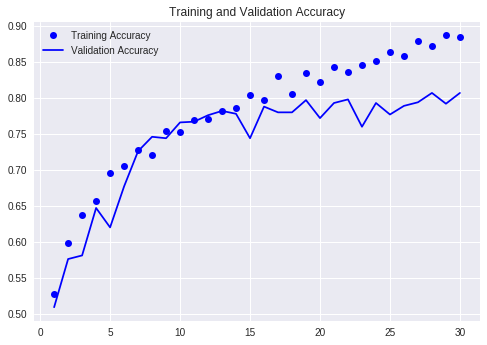

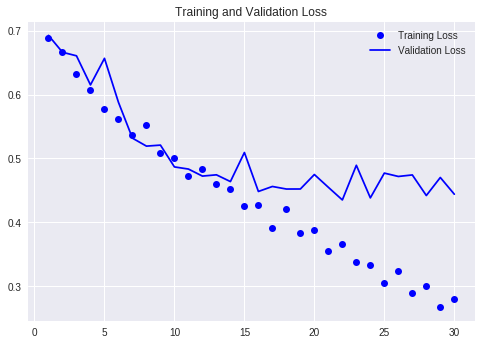

In [77]:
# history holds now the training process evolution we can use it to plot accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [0]:
# not so bad for a 3million param network we are overfitting because we lack samples we fixed this in Pytorch using data augmentation and we can do the same here
